## 🌲 XGBoost (Extreme Gradient Boosting) — Regression

first visit to :- [XGBoost-Classifier](../Classification_Algos/XGBoost_classifier.ipynb)

In [12]:
import pandas as pd
from xgboost import XGBRegressor
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

In [13]:
data = fetch_california_housing()
df = pd.DataFrame(data.data, columns=data.feature_names)
df["Target"] = data.target

X = df.drop("Target", axis=1)
y = df["Target"]

In [14]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [ ]:
xgb = XGBRegressor(
    n_estimators=200, # Number of trees
    learning_state=0.1, # Shrinkage step after each tree (small = slower but more accurate)
    max_depth=5, # Controls model complexity
    subsample=0.8, # Random % of rows used per tree
    colsample_bytree=0.8, # Random % of columns used per tree
    random_state=42,
)

xgb.fit(X_train,y_train)

y_pred=xgb.predict(X_test)

[20:37:35] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "learning_state" } are not used.



In [16]:
mse = mean_squared_error(y_test, y_pred)
rmse = mse**0.5
r2 = r2_score(y_test, y_pred)

print(f"MSE: {mse:.3f}")
print(f"RMSE: {rmse:.3f}")
print(f"R²: {r2:.3f}")

MSE: 0.216
RMSE: 0.465
R²: 0.835


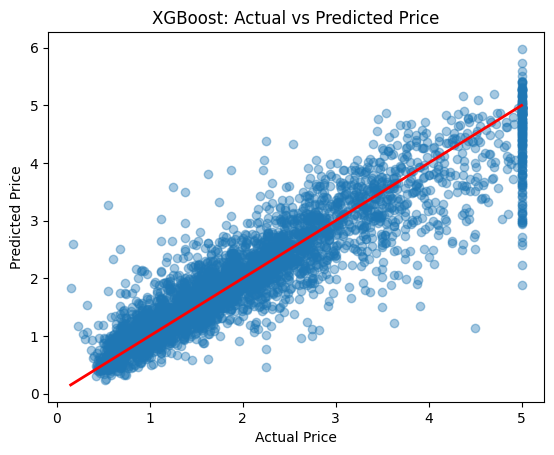

In [17]:
plt.scatter(y_test, y_pred, alpha=0.4)
plt.plot(
    [y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color="red", linewidth=2
)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("XGBoost: Actual vs Predicted Price")
plt.show()